# KMeans Clustering on Iris Dataset

This notebook demonstrates how to use **KMeans clustering** on the Iris dataset.
**Clustering is an unsupervised technique** to discover natural groupings in your data.

## Step 1: Import Required Libraries


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Step 2: Load the Iris Dataset
For this notebook the Iris dataset from `sklearn` has been used. K-means works best on **continuous features** like income, balance, age, etc.

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

##  Step 3: Standardise the Features
**Why?**
- KMeans uses **Euclidean distance**, which is scale-sensitive
- Standardisation ensures each feature contributes equally to the result
- `StandardScaler()` is the main one used before applying KMeans.

**StandardScaler standardizes each feature to mean 0 and standard deviation 1.**

This is helpful when:

    Features are on different scales (e.g., income in £000s vs. age in years)

    You want all features to contribute equally to Euclidean distance (which KMeans uses)


**May not be useful when:

    if some features are naturally more important or intentionally weighted (e.g., risk score vs. number of logins), scaling may flatten meaningful differences.

    Use MinMaxScaler to retain relative magnitudes (between 0 and 1)

    Leave raw features as-is if you want dominant features to drive the clustering



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Use the Elbow Method to Choose `k`
KMeans requires the number of clusters (`k`) in advance.
The **Elbow Method** helps identify the optimal `k` by plotting inertia (within-cluster variance).

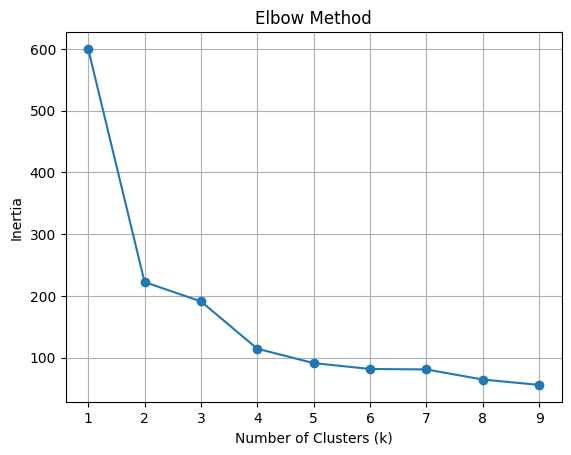

In [ ]:
inertias = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Step 5: Apply KMeans with Chosen `k`
We’ll use `k=3` since the Iris dataset has 3 species. In practice, use the elbow method or business knowledge.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

## Step 6: Evaluate Clustering Quality
**Best Practices:**
- Use **Silhouette Score**: how similar each point is to its cluster (higher is better)
- Use **Calinski-Harabasz**: higher means better-defined clusters
- Use **Davies-Bouldin**: lower is better
- Use **Adjusted Rand Index** *only* if you there true labels

In [ ]:
print('Silhouette Score:', silhouette_score(X_scaled, clusters))
print('Calinski-Harabasz Index:', calinski_harabasz_score(X_scaled, clusters))
print('Davies-Bouldin Index:', davies_bouldin_score(X_scaled, clusters))
print('Adjusted Rand Index:', adjusted_rand_score(y, clusters))

Silhouette Score: 0.4798814508199817
Calinski-Harabasz Index: 157.36015312192248
Davies-Bouldin Index: 0.7893630242997912
Adjusted Rand Index: 0.432804702527474


## Step 7: Visualise Clusters with PCA
**Why PCA?**
- Reduces dimensions to 2D for plotting
- Helps to see how well-separated clusters are
- Doesn’t affect clustering results

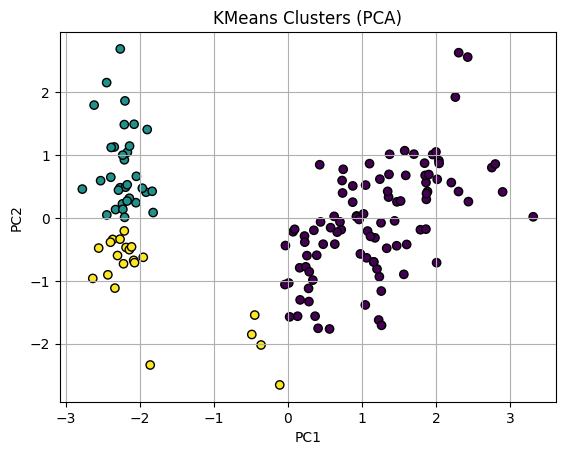

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## Step 8: Interpret Results
- A **higher Silhouette Score** means well-separated and compact clusters
- **Low Davies-Bouldin** suggests low intra-cluster variation and high separation
- Use the **PCA plot** to visually assess clustering performance


In [ ]:
# Example: Clustering based on income and balance
df = pd.DataFrame({
    'income': [45000, 68000, 52000, 120000, 35000, 98000],
    'balance': [2000, 5000, 1000, 20000, 500, 15000]
})

X_user = df[['income', 'balance']]
X_user_scaled = scaler.fit_transform(X_user)
user_kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = user_kmeans.fit_predict(X_user_scaled)
df

,income,balance,cluster
0,45000,2000,0
1,68000,5000,0
2,52000,1000,0
3,120000,20000,1
4,35000,500,0
5,98000,15000,1
